In [149]:
import requests
import json
import pandas as pd
from requests import get
import random
from itertools import product
import numpy as np
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
import random
import ast
import asyncio

In [151]:
import pandas as pd

# Load dataset
df = pd.read_csv('MPLID_S13_POS.csv')

# Daftar semua role unik
roles = df['Player_Role'].unique()

# Untuk menyimpan hasil top 5 hero tiap role
top_hero_per_role = {}

for role in roles:
    # Filter role tertentu
    df_role = df[df['Player_Role'] == role]
    # Ambil 5 hero teratas berdasarkan jumlah kemunculan
    top_heroes = df_role['Hero_Pick'].value_counts().head(5)
    top_hero_per_role[role] = top_heroes

# Tampilkan hasil
for role, heroes in top_hero_per_role.items():
    print(f"Role: {role}")
    print(heroes)
    print('-'*30)

Role: Jungler
Hero_Pick
Fredrinn    23
Baxia       16
Ling         5
Barats       5
Akai         4
Name: count, dtype: int64
------------------------------
Role: Explane
Hero_Pick
Cici        9
Terizla     9
Yu Zhong    8
Xborg       6
Masha       6
Name: count, dtype: int64
------------------------------
Role: Midlane
Hero_Pick
Luo Yi       16
Valentina    13
Novaria      11
Faramis       9
Pharsa        6
Name: count, dtype: int64
------------------------------
Role: Roamer
Hero_Pick
Ruby        10
Minotaur     9
Chip         9
Edith        8
Franco       5
Name: count, dtype: int64
------------------------------
Role: Goldlane
Hero_Pick
Roger     22
Claude    18
Karrie     9
Natan      7
Moskov     7
Name: count, dtype: int64
------------------------------


In [153]:
# Hasil value_counts top 5 hero per role, simpan sebagai list
jungler_list = ['Fredrinn', 'Baxia', 'Ling', 'Barats', 'Akai']
explane_list = ['Cici', 'Terizla', 'Yu Zhong', 'Xborg', 'Masha']
midlane_list = ['Luo Yi', 'Valentina', 'Novaria', 'Faramis', 'Pharsa']
roamer_list = ['Ruby', 'Minotaur', 'Chip', 'Edith', 'Franco']
goldlane_list = ['Roger', 'Claude', 'Karrie', 'Natan', 'Moskov']

print("jungler_list =", jungler_list)
print("explane_list =", explane_list)
print("midlane_list =", midlane_list)
print("roamer_list =", roamer_list)
print("goldlane_list =", goldlane_list)

jungler_list = ['Fredrinn', 'Baxia', 'Ling', 'Barats', 'Akai']
explane_list = ['Cici', 'Terizla', 'Yu Zhong', 'Xborg', 'Masha']
midlane_list = ['Luo Yi', 'Valentina', 'Novaria', 'Faramis', 'Pharsa']
roamer_list = ['Ruby', 'Minotaur', 'Chip', 'Edith', 'Franco']
goldlane_list = ['Roger', 'Claude', 'Karrie', 'Natan', 'Moskov']


In [155]:
# Misalkan sudah ada list 25 hero populer (gabungkan semua list role)
hero_populer = jungler_list + explane_list + midlane_list + roamer_list + goldlane_list

# Dapatkan unique player yang pernah memainkan salah satu dari 25 hero tersebut
player_list = df[df['Hero_Pick'].isin(hero_populer)]['Player_Name'].unique().tolist()

def append_player_list(hero_list, df):
    return df[df['Hero_Pick'].isin(hero_list)]['Player_Name'].unique().tolist()

# Contoh pakai:
player_list = append_player_list(hero_populer, df)
print(player_list)

['Reyy', 'Luke', 'Aboy', 'Vyn', 'Clayyy', 'Skylar', '1rrad', 'Caderaa', 'Baloyskie', 'Donn', 'Yehezkiel', 'Gugunnn', 'Kabuki', 'Clawkun', 'Fluffy', 'Branz', 'Anavel', 'Aran', 'Dreams', 'Kairi', 'Cw', 'Kiboy', 'Lutpiii', 'Sanz', 'Moreno', 'Kyy', 'Super Kenn', 'Emann', 'Xorizo']


In [157]:
import pandas as pd

df = pd.read_csv('MPLID_S13_POS.csv')

# List hero populer tiap role (isi sesuai hasil sebelumnya)
jungler_list = ['Fredrinn', 'Baxia', 'Ling', 'Barats', 'Akai']
explane_list = ['Cici', 'Terizla', 'Yu Zhong', 'Xborg', 'Masha']
midlane_list = ['Luo Yi', 'Valentina', 'Novaria', 'Faramis', 'Pharsa']
roamer_list = ['Ruby', 'Minotaur', 'Chip', 'Edith', 'Franco']
goldlane_list = ['Roger', 'Claude', 'Karrie', 'Natan', 'Moskov']

# Filtering ganda: role dan hero sesuai list populer
jungler_df = df[(df['Player_Role'] == 'Jungler') & (df['Hero_Pick'].isin(jungler_list))]
explane_df = df[(df['Player_Role'] == 'Explane') & (df['Hero_Pick'].isin(explane_list))]
midlane_df = df[(df['Player_Role'] == 'Midlane') & (df['Hero_Pick'].isin(midlane_list))]
roamer_df = df[(df['Player_Role'] == 'Roamer') & (df['Hero_Pick'].isin(roamer_list))]
goldlane_df = df[(df['Player_Role'] == 'Goldlane') & (df['Hero_Pick'].isin(goldlane_list))]

# Simpan ulang ke file CSV
jungler_df.to_csv('jungler_players.csv', index=False)
explane_df.to_csv('explane_players.csv', index=False)
midlane_df.to_csv('midlane_players.csv', index=False)
roamer_df.to_csv('roamer_players.csv', index=False)
goldlane_df.to_csv('goldlane_players.csv', index=False)

In [159]:
# Load semua file CSV hasil split per role
jungler_players = pd.read_csv('jungler_players.csv')
midlane_players = pd.read_csv('midlane_players.csv')
roamer_players = pd.read_csv('roamer_players.csv')
explane_players = pd.read_csv('explane_players.csv')
goldlane_players = pd.read_csv('goldlane_players.csv')

# Gabungkan semua dataframe menjadi satu
all_players = pd.concat([
    jungler_players,
    midlane_players,
    roamer_players,
    explane_players,
    goldlane_players
], ignore_index=True)

# Lihat hasil gabungan
print(all_players)
print(f"Total data gabungan: {len(all_players)} baris")

    Player_Name Player_Role Hero_Pick   KDA   Gold  Level  Partisipation  \
0          Reyy     Jungler      Ling  14.0  10540     15           0.78   
1         1rrad     Jungler     Baxia   0.6   4871     10           0.75   
2          Reyy     Jungler     Baxia   4.5   9158     15           0.60   
3         1rrad     Jungler  Fredrinn   1.0   7953     14           0.60   
4          Reyy     Jungler    Barats   3.0   9201     15           0.40   
..          ...         ...       ...   ...    ...    ...            ...   
245       Branz    Goldlane    Karrie   2.3  14925     15           0.64   
246       Branz    Goldlane     Roger  13.0  15127     15           0.76   
247          Cw    Goldlane     Roger   1.0  15009     15           1.00   
248          Cw    Goldlane    Claude   6.0  12667     15           0.78   
249       Branz    Goldlane    Karrie   0.5   9490     14           0.67   

     Damage_Dealt  Damage_Taken  Damage_Turret  
0           29512         30466       

In [161]:
all_players.to_csv('all_players.csv', index=False)

In [163]:
all_players.isnull().sum()

Player_Name      0
Player_Role      0
Hero_Pick        0
KDA              0
Gold             0
Level            0
Partisipation    0
Damage_Dealt     0
Damage_Taken     0
Damage_Turret    0
dtype: int64

In [165]:
all_players.duplicated().sum()

0

In [167]:
all_players.describe()

,KDA,Gold,Level,Partisipation,Damage_Dealt,Damage_Taken,Damage_Turret
count,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.00000
mean,5.394000,10681.184000,14.384000,0.71340,46014.492000,84208.468000,3887.72400
std,4.683373,3574.592267,1.167044,0.18008,28904.019725,51585.554545,6213.23722
min,0.000000,4246.000000,10.000000,0.00000,7422.000000,7057.000000,0.00000
25%,1.600000,8179.000000,14.000000,0.60000,25778.250000,47350.750000,0.00000
50%,3.750000,9971.000000,15.000000,0.75000,39293.500000,73368.000000,1132.50000
75%,7.875000,12386.250000,15.000000,0.82750,56412.250000,105475.500000,3975.00000
max,19.000000,25905.000000,15.000000,1.00000,186209.000000,299876.000000,28812.00000


In [169]:
def all_players(hero_list, df_role):
    # Filter sesuai hero_list (optional, data kamu mungkin sudah terfilter)
    df = df_role[df_role['Hero_Pick'].isin(hero_list)]
    # Ambil fitur numerik
    num_cols = ['KDA', 'Gold', 'Level', 'Partisipation', 'Damage_Dealt', 'Damage_Taken', 'Damage_Turret']
    # Hitung batas fuzzy: min, mean, max
    limits = df[num_cols].agg(['min', 'mean', 'max']).T
    limits = limits.rename(columns={'min': 'min_val', 'mean': 'mean_val', 'max': 'max_val'})
    # Reset index agar fitur jadi kolom
    limits = limits.reset_index().rename(columns={'index': 'Variable'})
    return limits

In [171]:
def getAllFuzzyLimits():
    jungler_limits = all_players(jungler_list, jungler_players)
    jungler_limits.insert(0, 'Role', 'Jungler')

    midlane_limits = all_players(midlane_list, midlane_players)
    midlane_limits.insert(0, 'Role', 'Midlane')

    roamer_limits = all_players(roamer_list, roamer_players)
    roamer_limits.insert(0, 'Role', 'Roamer')

    explane_limits = all_players(explane_list, explane_players)
    explane_limits.insert(0, 'Role', 'Explane')

    goldlane_limits = all_players(goldlane_list, goldlane_players)
    goldlane_limits.insert(0, 'Role', 'Goldlane')

    #combine all dataframe
    all_limits = pd.concat([jungler_limits, midlane_limits, roamer_limits,  explane_limits , goldlane_limits], ignore_index=True)
    return all_limits

In [173]:
fuzzy_limits = getAllFuzzyLimits()
print(fuzzy_limits)

        Role       Variable   min_val       mean_val   max_val
0    Jungler            KDA      0.00       4.915094      19.0
1    Jungler           Gold   4809.00    9884.056604   16994.0
2    Jungler          Level     10.00      14.528302      15.0
3    Jungler  Partisipation      0.40       0.718868       1.0
4    Jungler   Damage_Dealt   9987.00   29710.094340   54023.0
5    Jungler   Damage_Taken  28760.00  128549.735849  299876.0
6    Jungler  Damage_Turret      0.00     788.226415    5295.0
7    Midlane            KDA      0.00       6.960000      18.0
8    Midlane           Gold   4631.00   10388.709091   18151.0
9    Midlane          Level     10.00      14.327273      15.0
10   Midlane  Partisipation      0.00       0.795091       1.0
11   Midlane   Damage_Dealt  20601.00   67489.818182  186209.0
12   Midlane   Damage_Taken   7057.00   48626.636364  114058.0
13   Midlane  Damage_Turret      0.00    1576.600000    6299.0
14    Roamer            KDA      0.50       3.029268   

In [175]:
# Simpan hasil getAllFuzzyLimits ke CSV
fuzzy_limits = getAllFuzzyLimits()
fuzzy_limits.to_csv("fuzzy_limits.csv", index=False)

In [177]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import streamlit as st

df = pd.read_csv("fuzzy_limits.csv")

variables = ["KDA", "Gold", "Level", "Partisipation", "Damage_Dealt", "Damage_Taken", "Damage_Turret"]
subplot_titles = [
    "KDA Distribution", "Gold Distribution", "Level Distribution", 
    "Participation Distribution", "Damage Dealt Distribution", 
    "Damage Taken Distribution", "Damage Turret Distribution"
]

# Dictionary warna untuk tiap variabel
variable_colors = {
    "KDA": "#1f77b4",
    "Gold": "#ff7f0e",
    "Level": "#2ca02c",
    "Partisipation": "#d62728",
    "Damage_Dealt": "#9467bd",
    "Damage_Taken": "#8c564b",
    "Damage_Turret": "#e377c2"
}

def boxGraph(df):
    fig = make_subplots(rows=len(variables), cols=1, shared_xaxes=False, subplot_titles=subplot_titles)
    for i, var in enumerate(variables):
        color = variable_colors.get(var, "#333333")
        for role in df['Role'].unique():
            vals = df[(df['Role'] == role) & (df['Variable'] == var)]
            values = []
            if not vals.empty:
                row = vals.iloc[0]
                values = [row['min_val'], row['mean_val'], row['max_val']]
            if values:
                fig.add_trace(go.Box(
                    y=values, 
                    name=role, 
                    boxpoints='all', 
                    jitter=0.5,
                    marker_color=color,      # warna berdasarkan variabel
                    showlegend=(i==0)        # legend hanya sekali di subplot pertama
                ), row=i+1, col=1)
    fig.update_layout(height=1800, width=800, showlegend=True)
    st.plotly_chart(fig)

boxGraph(df)

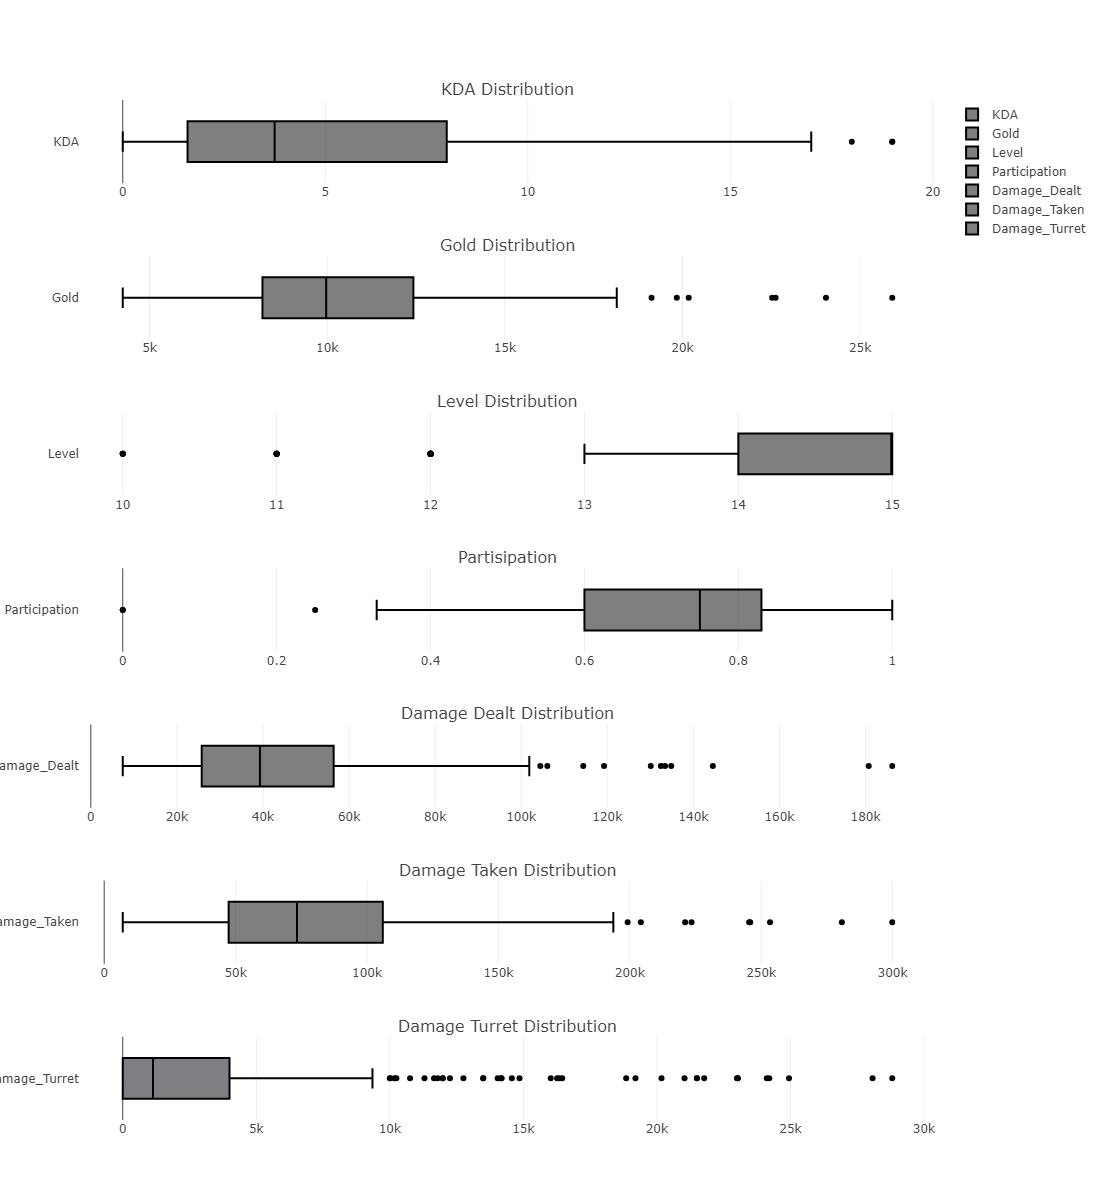

In [178]:
 fig.show()

In [182]:
# Contoh fungsi fuzzy membership (segitiga) dengan min, mean, max
def fuzzify(min_val, mean_val, max_val, x):
    # LOW
    if x <= mean_val:
        mu_low = (mean_val - x) / (mean_val - min_val) if mean_val != min_val else 0
    else:
        mu_low = 0
    # HIGH
    if x >= mean_val:
        mu_high = (x - mean_val) / (max_val - mean_val) if max_val != mean_val else 0
    else:
        mu_high = 0
    # MEDIUM (segitiga puncak di mean)
    if min_val < x < mean_val:
        mu_med = (x - min_val) / (mean_val - min_val) if mean_val != min_val else 0
    elif mean_val < x < max_val:
        mu_med = (max_val - x) / (max_val - mean_val) if max_val != mean_val else 0
    elif x == mean_val:
        mu_med = 1
    else:
        mu_med = 0
    return [round(mu_low, 2), round(mu_med, 2), round(mu_high, 2)]

In [184]:
def calculateMuValues(df, fuzzy_limits, stat_cols=None):
    if stat_cols is None:
        stat_cols = ['KDA', 'Gold', 'Level', 'Partisipation', 'Damage_Dealt', 'Damage_Taken', 'Damage_Turret']
    for col in stat_cols:
        mu_list = []
        for idx, row in df.iterrows():
            role = row['Player_Role']
            # Ambil batas fuzzy dari fuzzy_limits.csv berdasarkan Role dan Variable
            fuzzy_row = fuzzy_limits[(fuzzy_limits['Role'] == role) & (fuzzy_limits['Variable'] == col)]
            if fuzzy_row.empty:
                mu_list.append([0,0,0]) # fallback
                continue
            min_val = fuzzy_row['min_val'].values[0]
            mean_val = fuzzy_row['mean_val'].values[0]
            max_val = fuzzy_row['max_val'].values[0]
            mu = fuzzify(min_val, mean_val, max_val, row[col])
            mu_list.append(str(mu))
        df[f'mu_{col}'] = mu_list
    return df

In [186]:
# Load data
all_players = pd.read_csv('all_players.csv')
fuzzy_limits = pd.read_csv('fuzzy_limits.csv')

# Fuzzyfication
all_players_fuzzy = calculateMuValues(all_players, fuzzy_limits)
print(all_players_fuzzy)


    Player_Name Player_Role Hero_Pick   KDA   Gold  Level  Partisipation  \
0          Reyy     Jungler      Ling  14.0  10540     15           0.78   
1         1rrad     Jungler     Baxia   0.6   4871     10           0.75   
2          Reyy     Jungler     Baxia   4.5   9158     15           0.60   
3         1rrad     Jungler  Fredrinn   1.0   7953     14           0.60   
4          Reyy     Jungler    Barats   3.0   9201     15           0.40   
..          ...         ...       ...   ...    ...    ...            ...   
245       Branz    Goldlane    Karrie   2.3  14925     15           0.64   
246       Branz    Goldlane     Roger  13.0  15127     15           0.76   
247          Cw    Goldlane     Roger   1.0  15009     15           1.00   
248          Cw    Goldlane    Claude   6.0  12667     15           0.78   
249       Branz    Goldlane    Karrie   0.5   9490     14           0.67   

     Damage_Dealt  Damage_Taken  Damage_Turret           mu_KDA  \
0           29512   

In [188]:
import itertools
import pandas as pd

def createInferenceTable_fuzzyLabels(fuzzy_limits, output_var='Performance', output_membership=None):
    """
    Membuat inference table dari kombinasi label fuzzy.
    """
    fuzzy_labels = ['low', 'medium', 'high']
    all_combinations = list(itertools.product(fuzzy_labels, repeat=len(fuzzy_limits)))
    rules = []
    for comb in all_combinations:
        rule = dict(zip(fuzzy_limits, comb))
        # Output logic: custom sesuai kebutuhan
        high_count = comb.count('high')
        med_count = comb.count('medium')
        if high_count >= 2:
            rule[output_var] = output_membership[2] if output_membership else 'good'
        elif med_count >= 2:
            rule[output_var] = output_membership[1] if output_membership else 'decent'
        else:
            rule[output_var] = output_membership[0] if output_membership else 'bad'
        rules.append(rule)
    return pd.DataFrame(rules)

In [190]:
def getAllRules():
    # Jungler: KDA, level, Partisipation, Damage_Turret
    jungler_rules = createInferenceTable_fuzzyLabels(['KDA', 'Level', 'Partisipation', 'Damage_Taken'], output_var='Performance', output_membership=['bad', 'decent', 'good'])
    jungler_rules.insert(0, 'Role', 'Jungler')
    
    # Midlane: KDA, Gold, Partisipation, Damage_Dealt
    midlane_rules = createInferenceTable_fuzzyLabels(['KDA', 'Gold', 'Partisipation', 'Damage_Dealt'], output_var='Performance', output_membership=['bad', 'decent', 'good'])
    midlane_rules.insert(0, 'Role', 'Midlane')
    
    # Exp: KDA, Level,Partisipation, Damage_Taken
    exp_rules = createInferenceTable_fuzzyLabels(['KDA', 'Level','Partisipation', 'Damage_Taken'], output_var='Performance', output_membership=['bad', 'decent', 'good'])
    exp_rules.insert(0, 'Role', 'Explane')
    
    # Goldlane: KDA, Gold, Damage_Dealt, Damage_Dealt, Damage_Turret
    goldlane_rules = createInferenceTable_fuzzyLabels(['KDA', 'Gold', 'Damage_Dealt', 'Damage_Turret'], output_var='Performance', output_membership=['bad', 'decent', 'good'])
    goldlane_rules.insert(0, 'Role', 'Goldlane')
    
    # Roamer: KDA, Level, Partisipation, Damage_Taken, Damage_Turret
    roamer_rules = createInferenceTable_fuzzyLabels(['KDA', 'Gold', 'Partisipation', 'Damage_Taken'], output_var='Performance', output_membership=['bad', 'decent', 'good'])
    roamer_rules.insert(0, 'Role', 'Roamer')
    
    # Gabungkan semua
    all_rules = pd.concat([jungler_rules, midlane_rules, exp_rules, goldlane_rules, roamer_rules], ignore_index=True)

    # Pastikan semua kolom dari seluruh fitur ada
    all_columns = ['Role','KDA', 'Gold', 'Level', 'Partisipation', 'Damage_Dealt', 'Damage_Taken', 'Damage_Turret', 'Performance']
    for col in all_columns:
        if col not in all_rules.columns:
            all_rules[col] = 'none'
    # Urutkan kolom sesuai all_columns
    all_rules = all_rules[all_columns]

    # Ganti NaN dengan "none"
    all_rules = all_rules.fillna('NaN')
    
    return all_rules

In [192]:
all_rules = getAllRules()
display(all_rules)  # Jika menggunakan Jupyter Notebook/JupyterLab

,Role,KDA,Gold,Level,Partisipation,Damage_Dealt,Damage_Taken,Damage_Turret,Performance
0,Jungler,low,NaN,low,low,NaN,low,NaN,bad
1,Jungler,low,NaN,low,low,NaN,medium,NaN,bad
2,Jungler,low,NaN,low,low,NaN,high,NaN,bad
3,Jungler,low,NaN,low,medium,NaN,low,NaN,bad
4,Jungler,low,NaN,low,medium,NaN,medium,NaN,decent
...,...,...,...,...,...,...,...,...,...
400,Roamer,high,high,NaN,medium,NaN,medium,NaN,good
401,Roamer,high,high,NaN,medium,NaN,high,NaN,good
402,Roamer,high,high,NaN,high,NaN,low,NaN,good
403,Roamer,high,high,NaN,high,NaN,medium,NaN,good


In [194]:
# Simpan hasil getAllRules ke CSV
allrules = getAllRules()
allrules.to_csv("playerinference_rules.csv", index=False)

In [196]:
def getRandomizedSample(fuzzy_limits, role, stat_cols=None, n_per_label=3):
    """
    Membuat sample random per label fuzzy (low, medium, high) untuk setiap kolom statistik
    berdasarkan fuzzy_limits (min_val, mean_val, max_val) untuk role tertentu.
    Return: DataFrame dengan kolom sesuai stat_cols + 'fuzzy_label'.
    """
    if stat_cols is None:
        stat_cols = fuzzy_limits[fuzzy_limits['Role'] == role]['Variable'].tolist()
    fuzzy_labels = ['low', 'medium', 'high']
    samples = {col: [] for col in stat_cols}
    samples['fuzzy_label'] = []

    # Ambil limit untuk role ini sebagai dict
    limits = {}
    for col in stat_cols:
        row = fuzzy_limits[(fuzzy_limits['Role'] == role) & (fuzzy_limits['Variable'] == col)]
        if not row.empty:
            limits[col] = {
                'min': row['min_val'].values[0],
                'mean': row['mean_val'].values[0],
                'max': row['max_val'].values[0]
            }

    for label in fuzzy_labels:
        for _ in range(n_per_label):
            for col in stat_cols:
                lim = limits[col]
                if label == 'low':
                    v = np.random.uniform(lim['min'], lim['mean'])
                elif label == 'medium':
                    v = np.random.uniform(lim['min'], lim['max'])
                elif label == 'high':
                    v = np.random.uniform(lim['mean'], lim['max'])
                samples[col].append(v)
            samples['fuzzy_label'].append(label)
    return pd.DataFrame(samples)

In [198]:
def defuzzification(inferenced_table):
    """
    Melakukan proses defuzzifikasi pada tabel inference hasil fuzzy.
    - Mengelompokkan nilai min(mu) untuk masing-masing kategori output ('bad', 'decent', 'good').
    - Mengembalikan nilai maksimum dari tiap kelompok sebagai representasi output crisp.
    """
    bad, decent, good = [], [], []

    # Tentukan kolom mu (float/int)
    mu_cols = [col for col in inferenced_table.columns 
               if col not in ['Role', 'Performance'] and np.issubdtype(inferenced_table[col].dtype, np.number)]

    # Drop kolom yang seluruhnya NaN
    inferenced_table = inferenced_table.dropna(axis=1, how='all')

    for idx, row in inferenced_table.iterrows():
        perf = row['Performance']
        mu_values = row[mu_cols].values
        # Jika semua mu adalah nan, skip
        mu_values = mu_values[~np.isnan(mu_values)]
        if len(mu_values) == 0:
            continue
        min_mu = np.min(mu_values)
        if perf == 'bad':
            bad.append(min_mu)
        elif perf == 'decent':
            decent.append(min_mu)
        elif perf == 'good':
            good.append(min_mu)

    # Jika tidak ada anggota, hasilkan 0 agar tidak error
    max_bad = max(bad) if bad else 0
    max_decent = max(decent) if decent else 0
    max_good = max(good) if good else 0

    return [max_bad, max_decent, max_good]

In [200]:
fuzzy_limits = pd.read_csv('fuzzy_limits.csv')

In [202]:
# Pastikan fuzzy_limits sudah dibaca sebelumnya
fuzzy_limits = pd.read_csv('fuzzy_limits.csv')

# Contoh generate random sample untuk semua role utama
roles = ['Jungler', 'Midlane', 'Explane', 'Goldlane', 'Roamer']
random_samples = []

for role in roles:
    # Pilih fitur yang sesuai dengan role, misal:
    if role == 'Jungler':
        stat_cols = ['KDA', 'Level', 'Partisipation', 'Damage_Taken']
    elif role == 'Midlane':
        stat_cols = ['KDA', 'Gold', 'Partisipation', 'Damage_Dealt']
    elif role == 'Explane':
        stat_cols = ['KDA', 'Level', 'Partisipation', 'Damage_Taken']
    elif role == 'Goldlane':
        stat_cols = ['KDA', 'Gold', 'Damage_Dealt', 'Damage_Turret']
    elif role == 'Roamer':
        stat_cols = ['KDA', 'Gold', 'Partisipation', 'Damage_Taken']
    else:
        continue

    sample = getRandomizedSample(fuzzy_limits, role=role, stat_cols=stat_cols, n_per_label=3)
    sample['Role'] = role
    random_samples.append(sample)

# Gabungkan seluruh sample
randomsample = pd.concat(random_samples, ignore_index=True)

In [204]:
# Pastikan stat_cols sudah didefinisikan sesuai dengan pipeline kamu
stat_cols = ['KDA', 'Gold', 'Level', 'Partisipation', 'Damage_Dealt', 'Damage_Taken', 'Damage_Turret']

# Hitung derajat keanggotaan fuzzy (mu) untuk setiap fitur/statistik pemain
fuzzy_df = calculateMuValues(all_players.copy(), fuzzy_limits)

# Pilih kolom yang ingin ditampilkan
selected_cols = ["Player_Name", "Hero_Pick", "Player_Role"] + [f"mu_{col}" for col in stat_cols if f"mu_{col}" in fuzzy_df.columns]
hasil_fuzzy = fuzzy_df[selected_cols]

# Tampilkan hasil (untuk Jupyter Notebook, gunakan display; kalau script biasa, gunakan print atau hasil_fuzzy.head())
display(hasil_fuzzy)

,Player_Name,Hero_Pick,Player_Role,mu_KDA,mu_Gold,mu_Level,mu_Partisipation,mu_Damage_Dealt,mu_Damage_Taken,mu_Damage_Turret
0,Reyy,Ling,Jungler,"[0, 0.35, 0.65]","[0, 0.91, 0.09]","[0, 0, 1.0]","[0, 0.78, 0.22]","[0.01, 0.99, 0]","[0.98, 0.02, 0]","[0, 0.47, 0.53]"
1,1rrad,Baxia,Jungler,"[0.88, 0.12, 0]","[0.99, 0.01, 0]","[1.0, 0, 0]","[0, 0.89, 0.11]","[0.57, 0.43, 0]","[0.31, 0.69, 0]","[1.0, 0, 0]"
2,Reyy,Baxia,Jungler,"[0.08, 0.92, 0]","[0.14, 0.86, 0]","[0, 0, 1.0]","[0.37, 0.63, 0]","[0.29, 0.71, 0]","[0.28, 0.72, 0]","[0.25, 0.75, 0]"
3,1rrad,Fredrinn,Jungler,"[0.8, 0.2, 0]","[0.38, 0.62, 0]","[0.12, 0.88, 0]","[0.37, 0.63, 0]","[0, 0.86, 0.14]","[0.15, 0.85, 0]","[1.0, 0, 0]"
4,Reyy,Barats,Jungler,"[0.39, 0.61, 0]","[0.13, 0.87, 0]","[0, 0, 1.0]","[1.0, 0, 0]","[0, 0.75, 0.25]","[0, 0.83, 0.17]","[1.0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...
245,Branz,Karrie,Goldlane,"[0.7, 0.3, 0]","[0, 0.89, 0.11]","[0, 0, 1.0]","[0.09, 0.91, 0]","[0, 0.88, 0.12]","[0, 0.72, 0.28]","[1.0, 0, 0]"
246,Branz,Roger,Goldlane,"[0, 0.38, 0.62]","[0, 0.87, 0.13]","[0, 0, 1.0]","[0, 0.73, 0.27]","[0, 0.89, 0.11]","[0.2, 0.8, 0]","[0, 0.88, 0.12]"
247,Cw,Roger,Goldlane,"[0.92, 0.08, 0]","[0, 0.88, 0.12]","[0, 0, 1.0]","[0, 0, 1.0]","[0.17, 0.83, 0]","[0.63, 0.37, 0]","[0.11, 0.89, 0]"
248,Cw,Claude,Goldlane,"[0.09, 0.91, 0]","[0.12, 0.88, 0]","[0, 0, 1.0]","[0, 0.67, 0.33]","[0.15, 0.85, 0]","[0.02, 0.98, 0]","[0, 0.5, 0.5]"


In [206]:
hasil_fuzzy.to_csv('fuzzified_player.csv', index=False)

In [208]:
import pandas as pd
import ast

# Load data
df_fuzzy = pd.read_csv('fuzzified_player.csv')
df_rules = pd.read_csv('playerinference_rules.csv')

role_features = {
    'Jungler':     ['KDA', 'Level', 'Partisipation', 'Damage_Taken'],
    'Midlane':     ['KDA', 'Gold', 'Partisipation', 'Damage_Dealt'],
    'Explane':     ['KDA', 'Level', 'Partisipation', 'Damage_Taken'],
    'Goldlane':    ['KDA', 'Gold', 'Damage_Dealt', 'Damage_Turret'],
    'Roamer':      ['KDA', 'Gold', 'Partisipation', 'Damage_Taken'],
}

def get_fuzzy_label(mu_str):
    # Mendukung format string list atau string tuple, misal: '[0.2, 0.5, 0.3]'
    if isinstance(mu_str, str):
        mu = ast.literal_eval(mu_str)
    else:
        mu = list(mu_str)
    idx = mu.index(max(mu))
    return ['low', 'medium', 'high'][idx]

rows = []
for idx, row in df_fuzzy.iterrows():
    role = row['Player_Role']
    features = role_features.get(role, [])
    if not features:
        continue

    label_row = {
        'Player_Name': row['Player_Name'],
        'Player_Role': role,
        'Hero_Pick': row['Hero_Pick'],
    }
    # Konversi: kolom fitur berisi label fuzzy
    for feat in features:
        mu_col = f'mu_{feat}'
        if mu_col in row and pd.notna(row[mu_col]):
            label_row[feat] = get_fuzzy_label(row[mu_col])
        else:
            label_row[feat] = 'none'

    # Cek rule
    cond = (df_rules['Role'] == role)
    for feat in features:
        cond &= (df_rules[feat] == label_row[feat])
    matched = df_rules[cond]
    performance = matched['Performance'].iloc[0] if not matched.empty else 'unknown'
    label_row['Performance'] = performance

    rows.append(label_row)

# Buat urutan kolom yang diinginkan
final_columns = ['Player_Name', 'Player_Role', 'Hero_Pick']
# Tambahkan fitur sesuai role, lalu 'Performance'
for role, feats in role_features.items():
    for feat in feats:
        if feat not in final_columns:
            final_columns.append(feat)
final_columns.append('Performance')

# Buang duplikat urutan fitur
final_columns = final_columns[:3] + list(dict.fromkeys(final_columns[3:-1])) + [final_columns[-1]]

df_final = pd.DataFrame(rows)
df_final = df_final[[col for col in final_columns if col in df_final.columns]]

# Untuk notebook, gunakan display(df_final). Untuk script, gunakan print atau simpan:
print(df_final)


    Player_Name Player_Role Hero_Pick     KDA   Level Partisipation  \
0          Reyy     Jungler      Ling    high    high        medium   
1         1rrad     Jungler     Baxia     low     low        medium   
2          Reyy     Jungler     Baxia  medium    high        medium   
3         1rrad     Jungler  Fredrinn     low  medium        medium   
4          Reyy     Jungler    Barats  medium    high           low   
..          ...         ...       ...     ...     ...           ...   
245       Branz    Goldlane    Karrie     low     NaN           NaN   
246       Branz    Goldlane     Roger    high     NaN           NaN   
247          Cw    Goldlane     Roger     low     NaN           NaN   
248          Cw    Goldlane    Claude  medium     NaN           NaN   
249       Branz    Goldlane    Karrie     low     NaN           NaN   

    Damage_Taken    Gold Damage_Dealt Damage_Turret Performance  
0            low     NaN          NaN           NaN        good  
1         mediu

In [1414]:
df_final


,Player_Name,Player_Role,Hero_Pick,KDA,Level,Partisipation,Damage_Taken,Gold,Damage_Dealt,Damage_Turret,Performance
0,Reyy,Jungler,Ling,high,high,medium,low,NaN,NaN,NaN,good
1,1rrad,Jungler,Baxia,low,low,medium,medium,NaN,NaN,NaN,decent
2,Reyy,Jungler,Baxia,medium,high,medium,medium,NaN,NaN,NaN,decent
3,1rrad,Jungler,Fredrinn,low,medium,medium,medium,NaN,NaN,NaN,decent
4,Reyy,Jungler,Barats,medium,high,low,medium,NaN,NaN,NaN,decent
5,1rrad,Jungler,Fredrinn,medium,high,low,medium,NaN,NaN,NaN,decent
6,Reyy,Jungler,Baxia,medium,high,high,medium,NaN,NaN,NaN,good
7,1rrad,Jungler,Fredrinn,medium,high,medium,medium,NaN,NaN,NaN,decent
8,Reyy,Jungler,Fredrinn,medium,high,medium,medium,NaN,NaN,NaN,decent
9,1rrad,Jungler,Akai,low,high,low,medium,NaN,NaN,NaN,bad


In [210]:
df_final.to_csv('fuzzylogic_final.csv', index=False)